In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [4]:
df = pd.read_csv('data/outdoor-temperature-hourly.csv')
df = df[df.temperature != 'DIFF']

df['ds'] = df['time']
df['y'] = df['temperature']
df = df.drop(['name', 'time', 'temperature', 'seriesA', 'seriesB'], axis=1)
df.head(10)

,ds,y
0,2016-02-10T11:00:00Z,1.7
1,2016-02-10T12:00:00Z,1.983333333
2,2016-02-10T13:00:00Z,1.683333333
3,2016-02-10T14:00:00Z,1.6
4,2016-02-10T15:00:00Z,NaN
5,2016-02-10T16:00:00Z,NaN
6,2016-02-10T17:00:00Z,0.4
7,2016-02-10T18:00:00Z,-0.01666666667
8,2016-02-10T19:00:00Z,-0.28
9,2016-02-10T20:00:00Z,NaN


## Fit model and use it to make predictions

In [5]:
model = Prophet()
model.fit(df)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [6]:
future = model.make_future_dataframe(periods=24*50, freq = 'H')
future.tail()

,ds
10320,2017-04-15 15:00:00
10321,2017-04-15 16:00:00
10322,2017-04-15 17:00:00
10323,2017-04-15 18:00:00
10324,2017-04-15 19:00:00


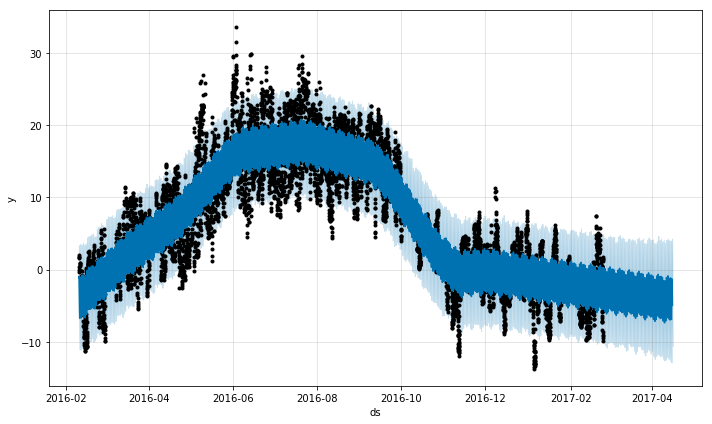

In [7]:
forecast = model.predict(future)
model.plot(forecast)

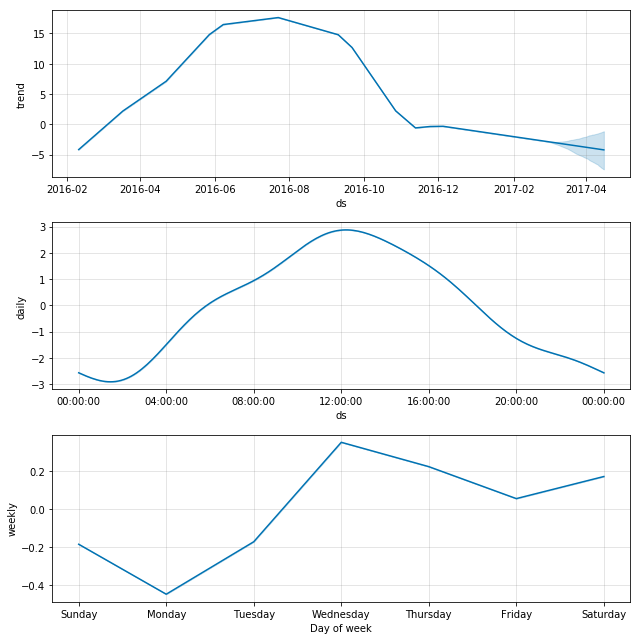

In [8]:
model.plot_components(forecast)